In [37]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray


In [38]:
data=np.load('C:\\Users\\11203\\pyStudy\\TranFraud\\pgm\\CAP-5771-s24-hw6-main\\CAP-5771-s24-hw6-main\\question1_cluster_data.npy')
labels=np.load('C:\\Users\\11203\\pyStudy\\TranFraud\\pgm\\CAP-5771-s24-hw6-main\\CAP-5771-s24-hw6-main\\question1_cluster_labels.npy')
n_points = data.shape[0]
indices = np.random.choice(n_points, size=5000, replace=False)

selected_data = data[indices]
selected_labels = labels[indices]
print(selected_data.shape)
print(selected_labels.shape)
list_i=[0,1,2,3,4]
slice={}
slice_labels={}
for i in list_i:
    slice[i]=selected_data[i*1000:(i+1)*1000]
    slice_labels[i]=selected_labels[i*1000:(i+1)*1000]

(5000, 2)
(5000,)


In [39]:
import numpy as np

"""def compute_distances(data):
    # Compute pairwise Euclidean distances between points
    n = data.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distances[i, j] = distances[j, i] = np.linalg.norm(data[i] - data[j])
    return distances
"""
def compute_distances(data):
    # Compute pairwise Euclidean distances between points
    distances = np.linalg.norm(data[:, np.newaxis, :] - data, axis=2)
    return distances

def compute_sse(data, clusters):
    centroids = np.array([np.mean(data[clusters == i], axis=0) for i in np.unique(clusters)])
    # Adjust cluster labels to start from 0
    clusters_adjusted = clusters - 1
    sse = np.sum((data - centroids[clusters_adjusted])**2)
    return sse
def calculate_ari(true_labels,predicted_labels):
    contingency_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(predicted_labels))))
    for i in range(len(true_labels)):
        contingency_matrix[true_labels[i], predicted_labels[i]] += 1
        n_samples = len(true_labels)
        n_ij_combinations = np.sum(contingency_matrix * (contingency_matrix - 1)) / 2
        a_i = np.sum(contingency_matrix, axis=1)
        b_j = np.sum(contingency_matrix, axis=0)
        n_choose_2 = n_samples * (n_samples - 1) / 2
        
        sum_combinations_a_i = np.sum(a_i * (a_i - 1)) / 2
        sum_combinations_b_j = np.sum(b_j * (b_j - 1)) / 2
        
        expected_index = (sum_combinations_a_i * sum_combinations_b_j) / n_choose_2
        max_index = (sum_combinations_a_i + sum_combinations_b_j) / 2
        ARI = (n_ij_combinations - expected_index) / (max_index - expected_index)
    return ARI


In [49]:
def jarvis_patrick2(data, smin, k):
    distances = compute_distances(data)
    n = len(data)
    clusters = np.zeros(n, dtype=int)
    
    for i in range(n):
        neighbors = np.argsort(distances[i])[:k]
        for j in neighbors:
            if j == i:
                continue
            shared_neighbors = len(np.intersect1d(np.where(distances[i] <= smin), np.where(distances[j] <= smin)))
            if shared_neighbors >= smin:
                if clusters[i] == 0 and clusters[j] == 0:
                    clusters[i] = clusters[j] = np.max(clusters) + 1
                elif clusters[i] == 0:
                    clusters[i] = clusters[j]
                elif clusters[j] == 0:
                    clusters[j] = clusters[i]
                else:
                    min_cluster = min(clusters[i], clusters[j])
                    clusters[clusters == clusters[i]] = min_cluster
                    clusters[clusters == clusters[j]] = min_cluster

    unique_clusters, counts = np.unique(clusters, return_counts=True)
    while len(unique_clusters) > 5:
        min_cluster = unique_clusters[np.argmin(counts)]
        clusters[clusters == min_cluster] = 0
        unique_clusters, counts = np.unique(clusters, return_counts=True)
    
    new_clusters = np.zeros(len(clusters), dtype=int)
    for i, cluster in enumerate(unique_clusters):
        new_clusters[clusters == cluster] = i + 1
        print(f"Cluster {i + 1}: {counts[i]} points")

    return new_clusters

In [41]:
"""np.random.seed(0)
test_labels = np.random.randint(0, 5, size=10)
np.random.seed(0)
test_data = np.random.rand(10, 2)
smin_values = [4]
k_values = [3]
groups=[]
sse_list1=[]
ari_list1=[]
best_smin = None
best_ari = -1
best_k = None
for smin in smin_values:
    for k in k_values:
        clusters = jarvis_patrick(test_data, smin, k)
        sse = compute_sse(test_data, clusters)
        ari = calculate_ari(test_labels, clusters-1)
        groups.append( {"smin": smin, "k":k,"ARI": ari, "SSE": sse})
        sse_list1.append(sse)
        ari_list1.append(ari)
        print(f"smin={smin}, k={k}, SSE={sse}, ARI={ari}")
        if ari > best_ari:
            best_ari = ari
            best_smin = smin
            best_k = k
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        markers = ['o', 's', '^', 'D', 'x']
        n_clusters = len(np.unique(clusters))
        plt.figure(figsize=(8, 6))
        for i in range(1, n_clusters + 1):
            cluster_points = test_data[clusters == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i % len(colors)], marker=markers[i % len(markers)], label=f'Cluster {i}')

        plt.title(f'Cluster Visualization (smin={smin}, k={k})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
print(f"Best ARI: {best_ari}, smin={best_smin}, k={best_k}")"""

'np.random.seed(0)\ntest_labels = np.random.randint(0, 5, size=10)\nnp.random.seed(0)\ntest_data = np.random.rand(10, 2)\nsmin_values = [4]\nk_values = [3]\ngroups=[]\nsse_list1=[]\nari_list1=[]\nbest_smin = None\nbest_ari = -1\nbest_k = None\nfor smin in smin_values:\n    for k in k_values:\n        clusters = jarvis_patrick(test_data, smin, k)\n        sse = compute_sse(test_data, clusters)\n        ari = calculate_ari(test_labels, clusters-1)\n        groups.append( {"smin": smin, "k":k,"ARI": ari, "SSE": sse})\n        sse_list1.append(sse)\n        ari_list1.append(ari)\n        print(f"smin={smin}, k={k}, SSE={sse}, ARI={ari}")\n        if ari > best_ari:\n            best_ari = ari\n            best_smin = smin\n            best_k = k\n        colors = [\'r\', \'g\', \'b\', \'c\', \'m\', \'y\', \'k\']\n        markers = [\'o\', \'s\', \'^\', \'D\', \'x\']\n        n_clusters = len(np.unique(clusters))\n        plt.figure(figsize=(8, 6))\n        for i in range(1, n_clusters + 1)

Cluster 1: 157 points
Cluster 2: 125 points
Cluster 3: 423 points
Cluster 4: 265 points
Cluster 5: 30 points
smin=0.15, k=10, SSE=1897.950608184765, ARI=0.5636520901841802


C:\Users\11203\AppData\Local\Temp\ipykernel_6176\76736107.py:38: RuntimeWarning: invalid value encountered in scalar divide
  ARI = (n_ij_combinations - expected_index) / (max_index - expected_index)


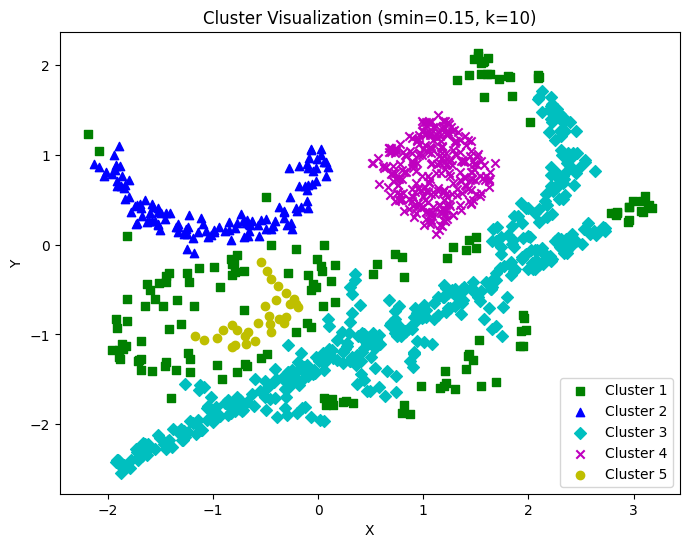

Best ARI: 0.5636520901841802, smin=0.15, k=10


In [42]:
smin_values = [0.15]
k_values = [10]
#smin_values = [4,6,8,10]
#k_values = [3,5,7,8]
groups=[]
sse_list1=[]
ari_list1=[]
best_smin = None
best_ari = -1
best_k = None
for smin in smin_values:
    for k in k_values:
        clusters = jarvis_patrick2(slice[0], smin, k)
        sse = compute_sse(slice[0], clusters)
        ari = calculate_ari(slice_labels[0], clusters-1)
        groups.append( {"smin": smin, "k":k,"ARI": ari, "SSE": sse})
        sse_list1.append(sse)
        ari_list1.append(ari)
        print(f"smin={smin}, k={k}, SSE={sse}, ARI={ari}")
        if ari > best_ari:
            best_ari = ari
            best_smin = smin
            best_k = k
        colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        markers = ['o', 's', '^', 'D', 'x']
        n_clusters = len(np.unique(clusters))
        plt.figure(figsize=(8, 6))
        for i in range(1, n_clusters +1 ):
            cluster_points = slice[0][clusters == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i % len(colors)], marker=markers[i % len(markers)], label=f'Cluster {i}')

        plt.title(f'Cluster Visualization (smin={smin}, k={k})')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()
print(f"Best ARI: {best_ari}, smin={best_smin}, k={best_k}")

In [43]:
groups

[{'smin': 0.15, 'k': 10, 'ARI': 0.5636520901841802, 'SSE': 1897.950608184765}]

In [44]:
groups = {i: {'smin': group['smin'], 'k':group['k'],'ARI': group['ARI'], 'SSE': group['SSE']} for i, group in enumerate(groups)}
groups


{0: {'smin': 0.15,
  'k': 10,
  'ARI': 0.5636520901841802,
  'SSE': 1897.950608184765}}

In [19]:
max_ari2 = -float('inf')
target_sse = None
for i in range(len(groups)):
        if groups[i]["ARI"] > max_ari2:
            max_ari2 = groups[i]["ARI"]
            target_sse = groups[i]["SSE"]
target_sse

1535.8065109582985

Cluster 1: 157 points
Cluster 2: 125 points
Cluster 3: 423 points
Cluster 4: 265 points
Cluster 5: 30 points
SSE=1897.950608184765, ARI=0.5636520901841802


C:\Users\11203\AppData\Local\Temp\ipykernel_6176\76736107.py:38: RuntimeWarning: invalid value encountered in scalar divide
  ARI = (n_ij_combinations - expected_index) / (max_index - expected_index)


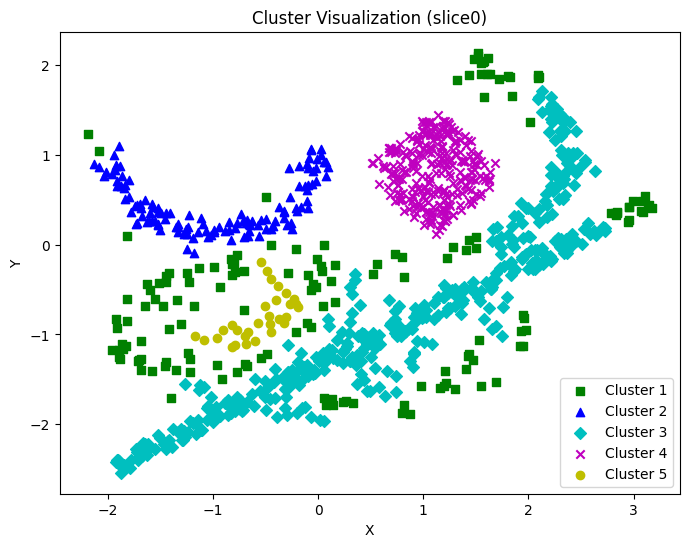

Cluster 1: 149 points
Cluster 2: 128 points
Cluster 3: 224 points
Cluster 4: 447 points
Cluster 5: 52 points
SSE=1519.7471769455847, ARI=0.5633188783510171


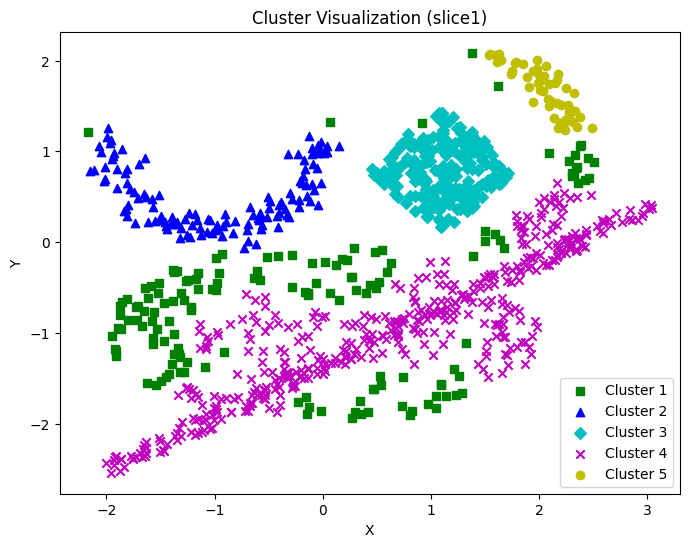

Cluster 1: 160 points
Cluster 2: 484 points
Cluster 3: 91 points
Cluster 4: 245 points
Cluster 5: 20 points
SSE=1928.4018452197627, ARI=0.5069172901995463


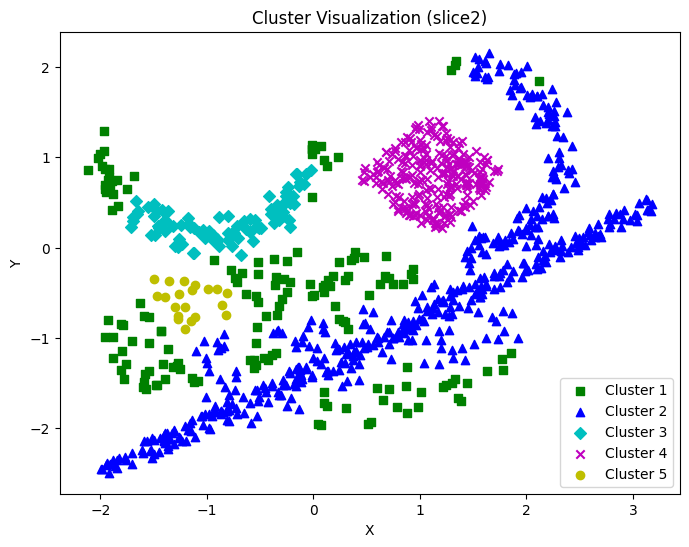

Cluster 1: 237 points
Cluster 2: 343 points
Cluster 3: 119 points
Cluster 4: 232 points
Cluster 5: 69 points
SSE=1562.8075595815021, ARI=0.7207054780503349


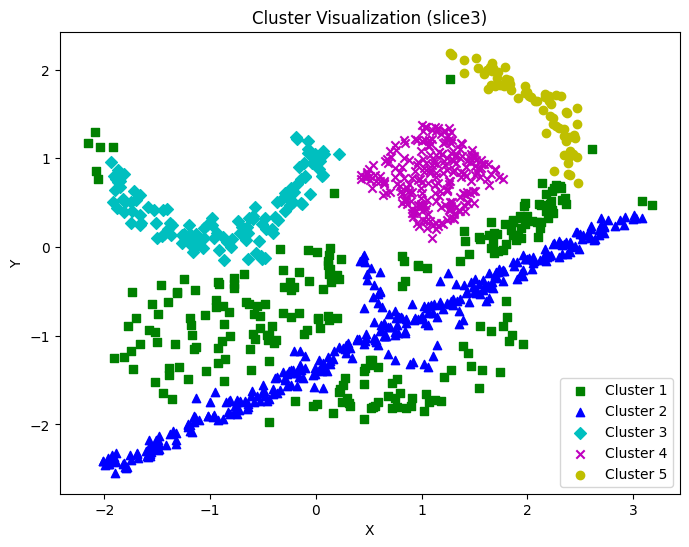

Cluster 1: 169 points
Cluster 2: 685 points
Cluster 3: 20 points
Cluster 4: 109 points
Cluster 5: 17 points
SSE=1976.0656829191355, ARI=0.2736101106434628


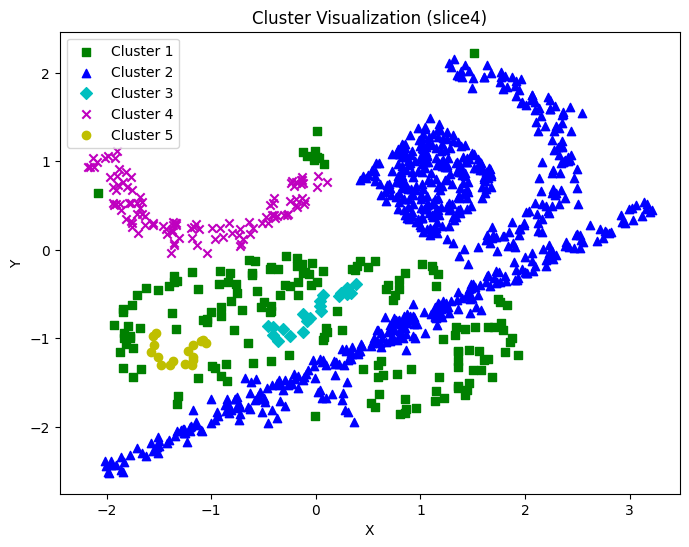

Average SSE: 1776.9945745701502
Average ARI: 0.5256407694857084


C:\Users\11203\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\11203\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\11203\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [45]:
average_sse = 0
average_ari = 0
sse_list2=[]
ari_list2=[]
for i in range(5):
    smin=best_smin
    k=best_k
    clusters = jarvis_patrick2(slice[i], smin, k)
    sse = compute_sse(slice[i], clusters)
    ari = calculate_ari(slice_labels[i], clusters-1)
    print(f"SSE={sse}, ARI={ari}")
    average_sse += sse
    average_ari += ari
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    markers = ['o', 's', '^', 'D', 'x']
    n_clusters = len(np.unique(clusters))
    plt.figure(figsize=(8, 6))
    for j in range(1, n_clusters +1 ):
            cluster_points = slice[i][clusters == j]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[j % len(colors)], marker=markers[j % len(markers)], label=f'Cluster {j}')

    plt.title(f'Cluster Visualization (slice{i})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
average_sse /= 5  # Divide by the number of slices
average_ari /= 5  # Divide by the number of slices
std_sse=np.std(sse_list2)
std_ari=np.std(ari_list2)
print(f"Average SSE: {average_sse}")
print(f"Average ARI: {average_ari}")

In [46]:
smin_values = [groups[i]['smin'] for i in groups]
k_values = [groups[i]['k'] for i in groups]
sse_values = [groups[i]['SSE'] for i in groups]
ari_values= [groups[i]['ARI'] for i in groups]

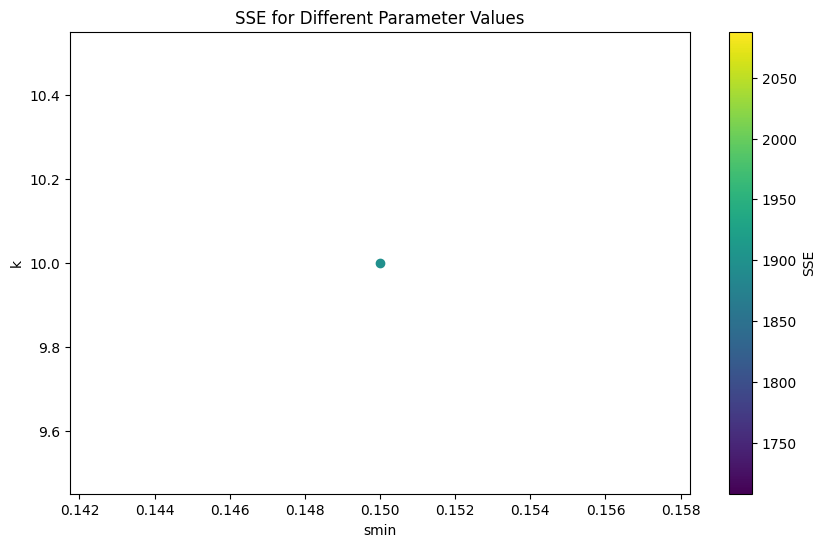

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(smin_values, k_values, c=sse_values, cmap='viridis')
plt.colorbar(label='SSE')
plt.xlabel('smin')
plt.ylabel('k')
plt.title('SSE for Different Parameter Values')
plt.show()

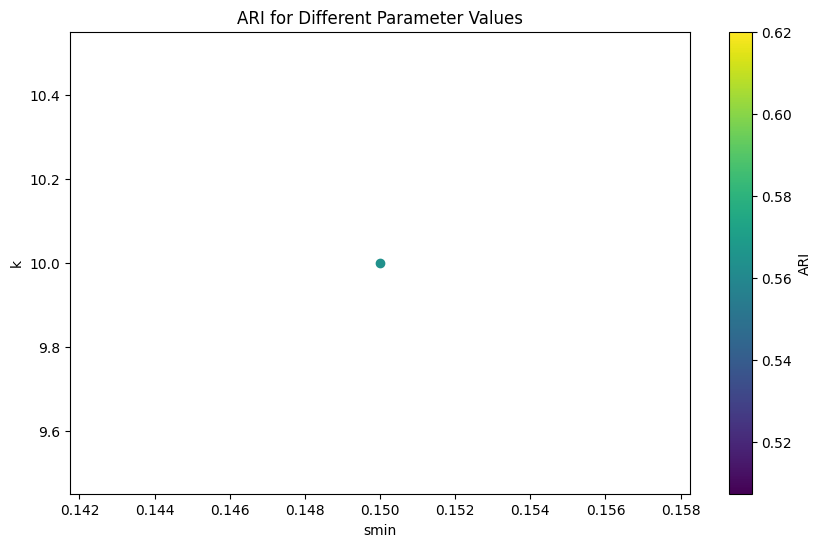

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(smin_values, k_values, c=ari_values, cmap='viridis')
plt.colorbar(label='ARI')
plt.xlabel('smin')
plt.ylabel('k')
plt.title('ARI for Different Parameter Values')
plt.show()